In [ ]:
!pip install osmtogeojson


  Preparing metadata (setup.py) ... done
  Created wheel for osmtogeojson: filename=osmtogeojson-0.0.2-py3-none-any.whl size=4037 sha256=59feaaadeab9005c907ac1564d4c27b78b168f3278ee410a02897da701a058e6
  Stored in directory: /root/.cache/pip/wheels/e8/7e/40/a54a29283fa23544687f3bc1f3ed2109b1fa09e3e0b6a10ec7
Successfully built osmtogeojson


In [ ]:
import json
from osmtogeojson import osmtogeojson

# Cargar el archivo JSON descargado de Overpass
json_path = '/content/mapa_granrosario.json'  # Cambia al nombre de tu archivo
with open(json_path, 'r') as file:
    overpass_data = json.load(file)

# Convertir a GeoJSON
geojson_data = osmtogeojson(overpass_data)

# Guardar como archivo GeoJSON
geojson_path = '/content/mapa_granrosario.json'
with open(geojson_path, 'w') as file:
    json.dump(geojson_data, file)

print(f'Archivo convertido y guardado en {geojson_path}')


TypeError: 'module' object is not callable

In [ ]:
import json

# Ruta al archivo JSON descargado de Overpass
json_path = '/content/mapa_granrosario.json'  # Cambia al nombre de tu archivo
geojson_path = '/content/mapa_granrosario.json'

# Función para convertir Overpass JSON a GeoJSON
def convert_to_geojson(overpass_json):
    features = []
    for element in overpass_json.get("elements", []):
        if "type" in element and "lat" in element and "lon" in element:
            # Crear GeoJSON para nodos (puntos)
            features.append({
                "type": "Feature",
                "geometry": {
                    "type": "Point",
                    "coordinates": [element["lon"], element["lat"]],
                },
                "properties": {k: v for k, v in element.items() if k not in ["type", "lat", "lon"]},
            })
        elif "type" in element and element["type"] == "way" and "nodes" in element:
            # Crear GeoJSON para caminos (líneas)
            features.append({
                "type": "Feature",
                "geometry": {
                    "type": "LineString",
                    "coordinates": [[node["lon"], node["lat"]] for node in element.get("geometry", [])],
                },
                "properties": {k: v for k, v in element.items() if k not in ["type", "geometry"]},
            })
        elif "type" in element and element["type"] == "relation" and "members" in element:
            # Crear GeoJSON para relaciones (polígonos u otros)
            features.append({
                "type": "Feature",
                "geometry": None,  # La geometría puede requerir procesarse más a fondo
                "properties": {k: v for k, v in element.items() if k not in ["type", "members"]},
            })

    return {
        "type": "FeatureCollection",
        "features": features,
    }

# Cargar el archivo JSON de Overpass
with open(json_path, 'r') as file:
    overpass_data = json.load(file)

# Convertir a GeoJSON
geojson_data = convert_to_geojson(overpass_data)

# Guardar el archivo GeoJSON
with open(geojson_path, 'w') as file:
    json.dump(geojson_data, file)

print(f'Archivo GeoJSON guardado en {geojson_path}')


Archivo GeoJSON guardado en /content/mapa_granrosario.json


In [ ]:
import folium

# Visualizar el archivo GeoJSON
mapa = folium.Map(location=[-32.9303, -60.3946], zoom_start=10)
folium.GeoJson(geojson_path, name="Gran Rosario").add_to(mapa)
mapa


In [ ]:
from google.colab import files
files.download(geojson_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json

# Verificar el archivo GeoJSON generado
with open(geojson_path, 'r') as file:
    data = json.load(file)

# Comprobar que es un GeoJSON válido
if "type" in data and data["type"] == "FeatureCollection":
    print("El archivo es un GeoJSON válido.")
else:
    print("El archivo no es un GeoJSON válido. Verifica la conversión.")


El archivo es un GeoJSON válido.


In [ ]:
from google.colab import files

# Descargar el archivo GeoJSON
files.download(geojson_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import folium

# Ruta al archivo GeoJSON cargado
geojson_path = '/content/mapa_granrosario.json'  # Cambia al nombre de tu archivo

# Crear un mapa centrado en un punto de referencia
mapa = folium.Map(location=[-32.9303, -60.3946], zoom_start=10)  # Ajusta las coordenadas y el zoom

# Agregar el archivo GeoJSON al mapa
folium.GeoJson(geojson_path, name="Gran Rosario").add_to(mapa)

# Mostrar el mapa
mapa


In [ ]:
import folium

# Ruta al archivo GeoJSON cargado
geojson_path = '/content/granrosario.geojson'  # Cambia al nombre de tu archivo

# Crear un mapa centrado en un punto de referencia
mapa = folium.Map(location=[-32.9303, -60.3946], zoom_start=10)  # Ajusta las coordenadas y el zoom

# Agregar el archivo GeoJSON al mapa
folium.GeoJson(geojson_path, name="Gran Rosario").add_to(mapa)

# Mostrar el mapa
mapa


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
# Check file contents
with open(geojson_path, 'r') as f:
    content = f.read()
    print(content)

Buffered data was truncated after reaching the output size limit.

In [ ]:
import json

# Ruta del archivo JSON descargado
json_path = '/content/mapa_rosario.json'

# Función para convertir Overpass JSON a GeoJSON
def overpass_to_geojson(overpass_json):
    features = []
    for element in overpass_json.get("elements", []):
        if element["type"] == "way":
            # Crear líneas o polígonos a partir de los límites
            coordinates = [[node["lon"], node["lat"]] for node in element.get("geometry", [])]
            features.append({
                "type": "Feature",
                "geometry": {
                    "type": "Polygon" if len(coordinates) > 2 else "LineString",  # Determinar si es polígono o línea
                    "coordinates": [coordinates],  # Asegurarse de que sea una lista de listas para el Polígono
                },
                "properties": {k: v for k, v in element.items() if k not in ["type", "geometry"]},
            })
    return {"type": "FeatureCollection", "features": features}

# Convertir y guardar como GeoJSON
geojson_path = '/content/mapa_rosario.json'
with open(json_path, 'r') as file:
    overpass_data = json.load(file)

geojson_data = overpass_to_geojson(overpass_data)

with open(geojson_path, 'w') as file:
    json.dump(geojson_data, file)

print(f'Archivo GeoJSON guardado en {geojson_path}')


Archivo GeoJSON guardado en /content/mapa_rosario.json


In [ ]:
import folium

# Ruta al archivo GeoJSON convertido
geojson_path = '/content/mapa_rosario.json'

# Mostrar el mapa
mapa


In [ ]:
import folium

# Ruta del archivo GeoJSON (ajusta la ruta según donde esté tu archivo)
geojson_path = '/content/mapa_rosario.geojson'

# Crear un mapa centrado en la ubicación de Rosario (ajustar según la zona que quieras ver)
mapa = folium.Map(location=[-32.9303, -60.3946], zoom_start=12)

# Cargar el archivo GeoJSON y añadirlo al mapa
folium.GeoJson(geojson_path).add_to(mapa)

# Mostrar el mapa
mapa


In [ ]:
import folium

# Ruta del archivo GeoJSON (ajusta la ruta según donde esté tu archivo)
geojson_path = '/content/funes.geojson'

# Crear un mapa centrado en la ubicación de Rosario (ajustar según la zona que quieras ver)
mapa = folium.Map(location=[-32.9303, -60.3946], zoom_start=12)

# Cargar el archivo GeoJSON y añadirlo al mapa
folium.GeoJson(geojson_path).add_to(mapa)

# Mostrar el mapa
mapa

In [ ]:
import folium

# Ruta del archivo GeoJSON (ajusta la ruta según donde esté tu archivo)
geojson_path = '/content/perez.geojson'

# Crear un mapa centrado en la ubicación de Rosario (ajustar según la zona que quieras ver)
mapa = folium.Map(location=[-32.9303, -60.3946], zoom_start=12)

# Cargar el archivo GeoJSON y añadirlo al mapa
folium.GeoJson(geojson_path).add_to(mapa)

# Mostrar el mapa
mapa

In [ ]:
import json

# Ruta al archivo GeoJSON cargado
geojson_path = '/content/mapa_granrosario.json'

# Cargar el archivo GeoJSON
with open(geojson_path, 'r') as file:
    data = json.load(file)

# Crear una nueva lista de características para almacenar las líneas
line_features = []

# Procesar las características existentes
for feature in data['features']:
    # Verificar si la geometría es de tipo Point y pertenece a un límite
    if feature['geometry']['type'] == 'Point':
        # Convertir los puntos en coordenadas
        coords = feature['geometry']['coordinates']

        # Verificar si ya existe una línea y agregar
        line_features.append(coords)

# Crear una nueva geometría de tipo LineString
linestring = {
    "type": "Feature",
    "geometry": {
        "type": "LineString",
        "coordinates": line_features,  # Ordenar los puntos en una línea continua
    },
    "properties": {"description": "Límite administrativo"}
}

# Crear el nuevo GeoJSON
new_geojson = {
    "type": "FeatureCollection",
    "features": [linestring]
}

# Guardar el nuevo GeoJSON en un archivo
new_geojson_path = '/content/limite_administrativo.geojson'
with open(new_geojson_path, 'w') as file:
    json.dump(new_geojson, file)

print(f'Nuevo archivo GeoJSON creado: {new_geojson_path}')


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import json

# Ruta al archivo GeoJSON cargado
geojson_path = '/content/mapa_granrosario.json'

# Cargar el archivo GeoJSON
with open(geojson_path, 'r') as file:
    data = json.load(file)

# Crear una nueva lista de características para almacenar las líneas
line_features = []

# Procesar las características existentes
for feature in data['features']:
    # Verificar si la geometría es de tipo Point y pertenece a un límite
    # Check if 'geometry' key exists and is not None before accessing its elements
    if feature.get('geometry') and feature['geometry'].get('type') == 'Point':
        # Convertir los puntos en coordenadas
        coords = feature['geometry']['coordinates']

        # Verificar si ya existe una línea y agregar
        line_features.append(coords)

# Crear una nueva geometría de tipo LineString
linestring = {
    "type": "Feature",
    "geometry": {
        "type": "LineString",
        "coordinates": line_features,  # Ordenar los puntos en una línea continua
    },
    "properties": {"description": "Límite administrativo"}
}

# Crear el nuevo GeoJSON
new_geojson = {
    "type": "FeatureCollection",
    "features": [linestring]
}

# Guardar el nuevo GeoJSON en un archivo
new_geojson_path = '/content/limite_administrativo.geojson'
with open(new_geojson_path, 'w') as file:
    json.dump(new_geojson, file)

print(f'Nuevo archivo GeoJSON creado: {new_geojson_path}')

Nuevo archivo GeoJSON creado: /content/limite_administrativo.geojson


In [ ]:
import folium

# Cargar y mostrar el GeoJSON con líneas
mapa = folium.Map(location=[-32.9303, -60.3946], zoom_start=10)
folium.GeoJson(new_geojson_path, name="Límite Administrativo").add_to(mapa)
mapa


In [ ]:
import geopandas as gpd
import pandas as pd # Add this line to import pandas

# Cargar los archivos GeoJSON
mapa1 = gpd.read_file('/content/mapa_granrosario.geojson')
mapa2 = gpd.read_file('/content/mapa_rosario.geojson')
mapa3 = gpd.read_file('/content/perez.geojson')
mapa4 = gpd.read_file('/content/funes.geojson')

# Verificar los sistemas de coordenadas (CRS)
print(mapa1.crs, mapa2.crs, mapa3.crs, mapa4)

# Cargar los archivos GeoJSON
mapa1 = gpd.read_file('/content/mapa_granrosario.geojson')
mapa2 = gpd.read_file('/content/mapa_rosario.geojson')
mapa3 = gpd.read_file('/content/perez.geojson')
mapa4 = gpd.read_file('/content/funes.geojson')

# Verificar los sistemas de coordenadas (CRS)
print(mapa1.crs, mapa2.crs, mapa3.crs, mapa4.crs)


EPSG:4326 EPSG:4326 EPSG:4326                  id               @id  \
0  relation/3368049  relation/3368049   
1    node/198450872    node/198450872   

                                          @relations admin_level  \
0                                               None           7   
1  [ { "role": "admin_centre", "rel": 3368049, "r...        None   

         boundary           contact:website is_in:country is_in:state  \
0  administrative  http://www.funes.gob.ar/     Argentina    Santa Fe   
1            None                      None          None        None   

                 name postal_code  \
0  Municipio de Funes       S2132   
1                None        None   

                                      source:url      type  wikidata  \
0  http://www.idesf.santafe.gov.ar/visualizador/  boundary  Q2370892   
1                                           None      None      None   

             wikipedia                                           geometry  
0  es:Funes (San

In [ ]:
# Concatenar los mapas en un solo GeoDataFrame
mapas_combinados = gpd.GeoDataFrame(pd.concat([mapa1, mapa2, mapa3, mapa4], ignore_index=True))


In [ ]:
mapas_combinados.to_file('mapas_combinados.geojson', driver='GeoJSON')


<Axes: >

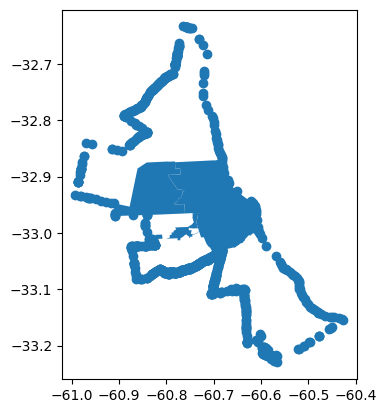

In [ ]:
mapas_combinados.plot()


In [ ]:
import geopandas as gpd
from shapely.geometry import MultiPolygon, Polygon, MultiPoint

# Cargar el GeoJSON
gdf = gpd.read_file('/content/granrosario.geojson')

# Filtrar las geometrías de tipo Point
points = gdf[gdf.geometry.type == 'Point']

# Agrupar los puntos (en este ejemplo, todos en un solo grupo)
multipoint = MultiPoint(points.geometry.values)

# Crear un polígono (por ejemplo, usando la envolvente convexa)
if multipoint.is_valid:
    polygon = Polygon(multipoint.convex_hull)  # Envolvente convexa

# Convertir el polígono a MultiPolygon
multipolygon = MultiPolygon([polygon])

# Crear un nuevo GeoDataFrame con el MultiPolygon
multipolygon_gdf = gpd.GeoDataFrame([{'geometry': multipolygon}], crs=gdf.crs)

# Guardar como GeoJSON
multipolygon_gdf.to_file('multipolygon_resultado.geojson', driver='GeoJSON')


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'granrosario.geojson': 'points' (default), 'lines', 'multilinestrings', 'multipolygons', 'other_relations'. Specify layer parameter to avoid this warning.
  result = read_func(


In [147]:
import folium
import json

# Cargar el archivo GeoJSON (ajusta el nombre del archivo según el nombre que subiste)
geojson_path = '/content/mapa_gr.geojson'  # Cambia este nombre si es necesario

# Crear el mapa centrado en las coordenadas del Gran Rosario (ajusta según sea necesario)
mapa = folium.Map(location=[-32.9096, -60.5086], zoom_start=12)

highlight_function=None,  # Evita los marcadores adicionales
show=False  # Deshabilita la visibilidad inicial

# Añadir el archivo GeoJSON al mapa
folium.GeoJson(geojson_path).add_to(mapa)

# Mostrar el mapa
mapa


In [148]:
import geopandas as gpd

# Cargar los archivos GeoJSON
mapa1 = gpd.read_file('/content/mapa_gr.geojson')
mapa2 = gpd.read_file('/content/mapa_rosario.geojson')
mapa3 = gpd.read_file('/content/funes.geojson')
mapa4 = gpd.read_file('/content/perez.geojson')

# Verificar los sistemas de coordenadas (CRS)
print(mapa1.crs, mapa2.crs, mapa3.crs, mapa4.crs)


EPSG:4326 EPSG:4326 EPSG:4326 EPSG:4326


In [149]:
# Concatenar los mapas en un solo GeoDataFrame
mapas_combinados = gpd.GeoDataFrame(pd.concat([mapa1, mapa2, mapa3, mapa4], ignore_index=True))


In [150]:
mapas_combinados.to_file('mapas_combinados.geojson', driver='GeoJSON')


<Axes: >

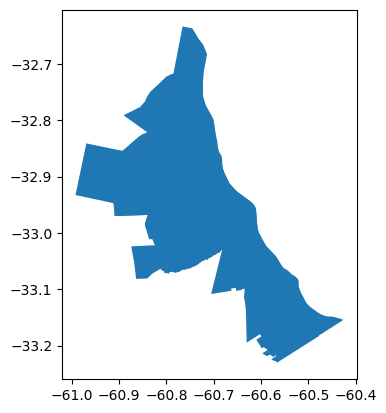

In [151]:
mapas_combinados.plot()


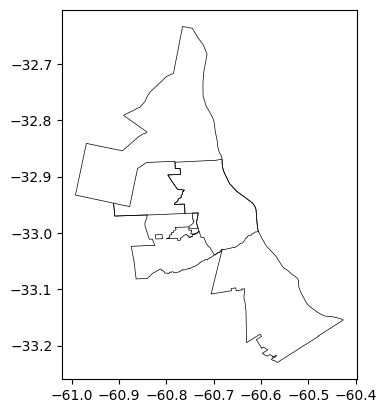

In [152]:
import matplotlib.pyplot as plt

# Visualizar los límites internos con contornos
mapas_combinados.boundary.plot(color='black', linewidth=0.5)
plt.show()


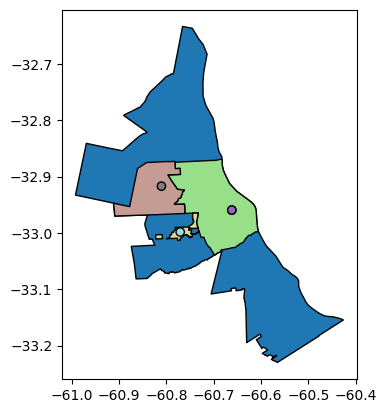

In [153]:
# Crear una columna para asignar colores (aleatorios o basados en un atributo)
mapas_combinados['color'] = range(len(mapas_combinados))

# Graficar con colores diferentes
mapas_combinados.plot(column='color', cmap='tab20', edgecolor='black', legend=False)
plt.show()


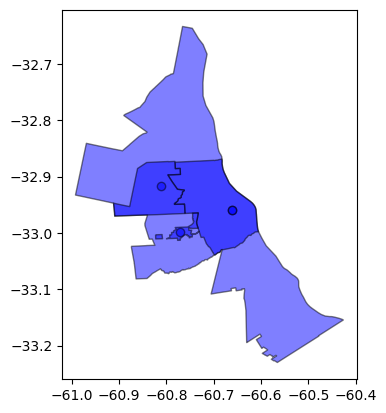

In [154]:
mapas_combinados.plot(color='blue', alpha=0.5, edgecolor='black')
plt.show()


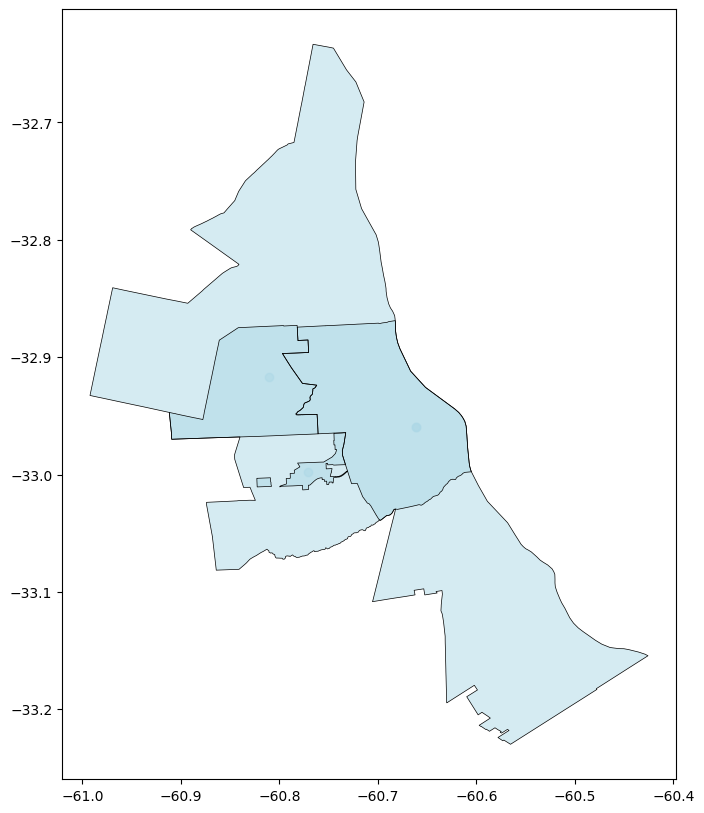

In [155]:
fig, ax = plt.subplots(figsize=(10, 10))

# Relleno transparente
mapas_combinados.plot(ax=ax, color='lightblue', alpha=0.5)

# Contornos
mapas_combinados.boundary.plot(ax=ax, color='black', linewidth=0.5)
plt.show()


In [ ]:
!pip install contextily


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 53.7 MB/s eta 0:00:00


In [156]:
# Reproyectar al sistema EPSG:3857
mapas_combinados = mapas_combinados.to_crs(epsg=3857)


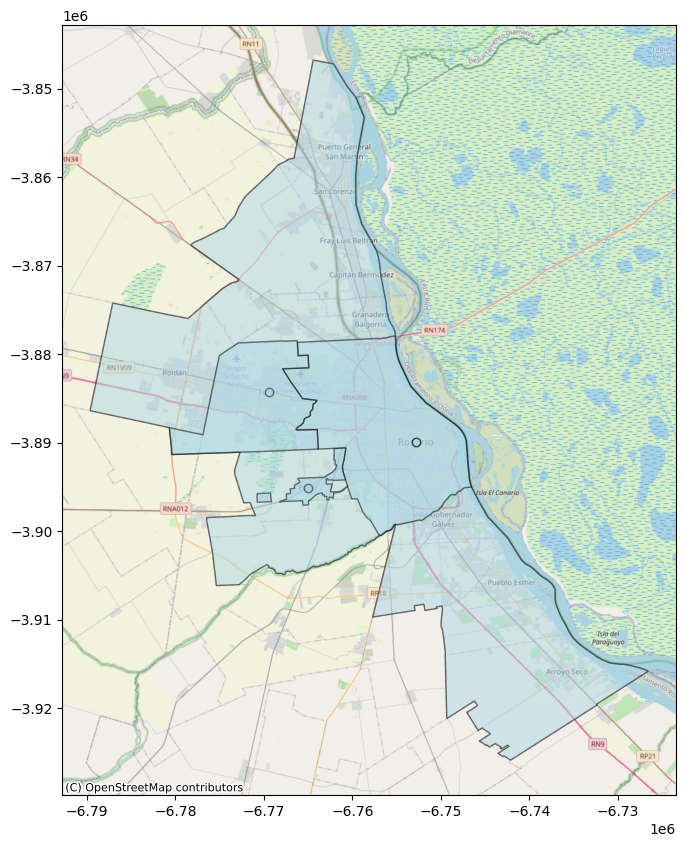

In [157]:
import contextily as ctx
import matplotlib.pyplot as plt

# Crear la visualización
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar tus geometrías
mapas_combinados.plot(ax=ax, alpha=0.5, edgecolor='black', color='lightblue')

# Agregar el mapa base de OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Mostrar el resultado
plt.show()


In [158]:
import geopandas as gpd

# Cargar los archivos GeoJSON
mapa1 = gpd.read_file('/content/mapa_gr.geojson')
mapa2 = gpd.read_file('/content/mapa_rosario.geojson')
mapa3 = gpd.read_file('/content/funes.geojson')
mapa4 = gpd.read_file('/content/perez.geojson')
mapa5 = gpd.read_file('/content/galvez.geojson')
mapa6 = gpd.read_file('/content/roldan.geojson')
mapa7 = gpd.read_file('/content/san lorenzo.geojson')
mapa8 = gpd.read_file('/content/constitucion.geojson')
mapa9 = gpd.read_file('/content/pueblo esther.geojson')
mapa10 = gpd.read_file('/content/fighiera.geojson')
mapa11 = gpd.read_file('/content/empalme_constitucion.geojson')
mapa12 = gpd.read_file('/content/pavon.geojson')

# Verificar los sistemas de coordenadas (CRS)
print(mapa1.crs, mapa2.crs, mapa3.crs, mapa4.crs, mapa5.crs, mapa6.crs, mapa7.crs, mapa8.crs, mapa9.crs, mapa10.crs, mapa11.crs, mapa12.crs)

EPSG:4326 EPSG:4326 EPSG:4326 EPSG:4326 EPSG:4326 EPSG:4326 EPSG:4326 EPSG:4326 EPSG:4326 EPSG:4326 EPSG:4326 EPSG:4326


In [159]:
# Concatenar los mapas en un solo GeoDataFrame
mapas_combinados = gpd.GeoDataFrame(pd.concat([mapa1, mapa2, mapa3, mapa4, mapa5, mapa6, mapa7, mapa8, mapa9, mapa10, mapa11, mapa12], ignore_index=True))

In [160]:
mapas_combinados.to_file('mapas_combinados.geojson', driver='GeoJSON')

<Axes: >

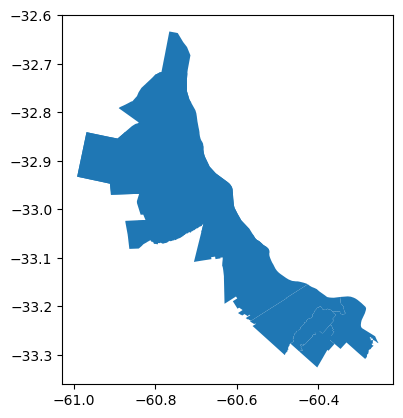

In [161]:
mapas_combinados.plot()

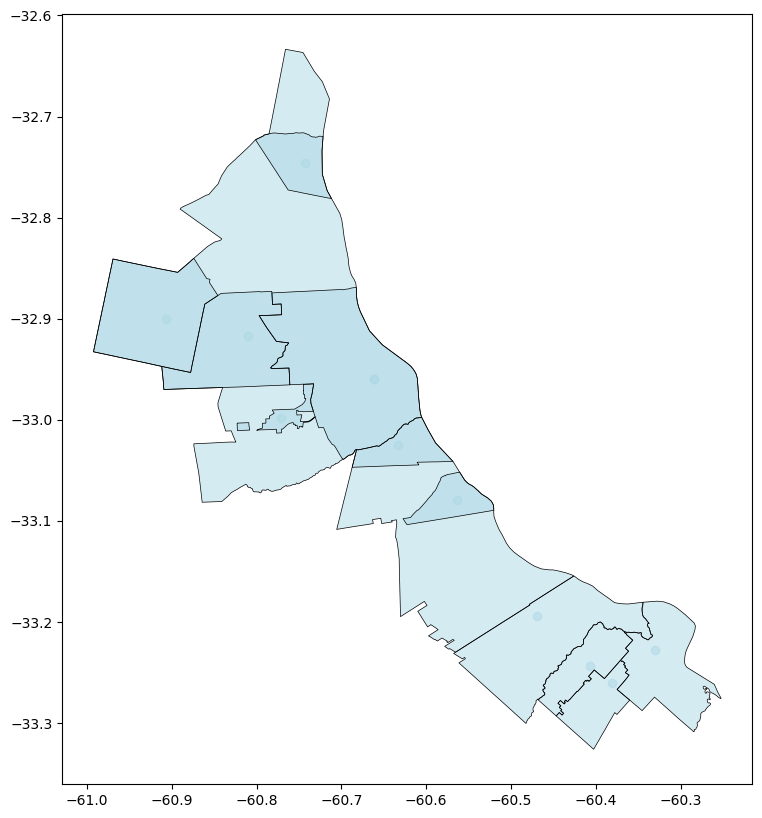

In [162]:
fig, ax = plt.subplots(figsize=(10, 10))

# Relleno transparente
mapas_combinados.plot(ax=ax, color='lightblue', alpha=0.5)

# Contornos
mapas_combinados.boundary.plot(ax=ax, color='black', linewidth=0.5)
plt.show()

/usr/local/lib/python3.10/dist-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


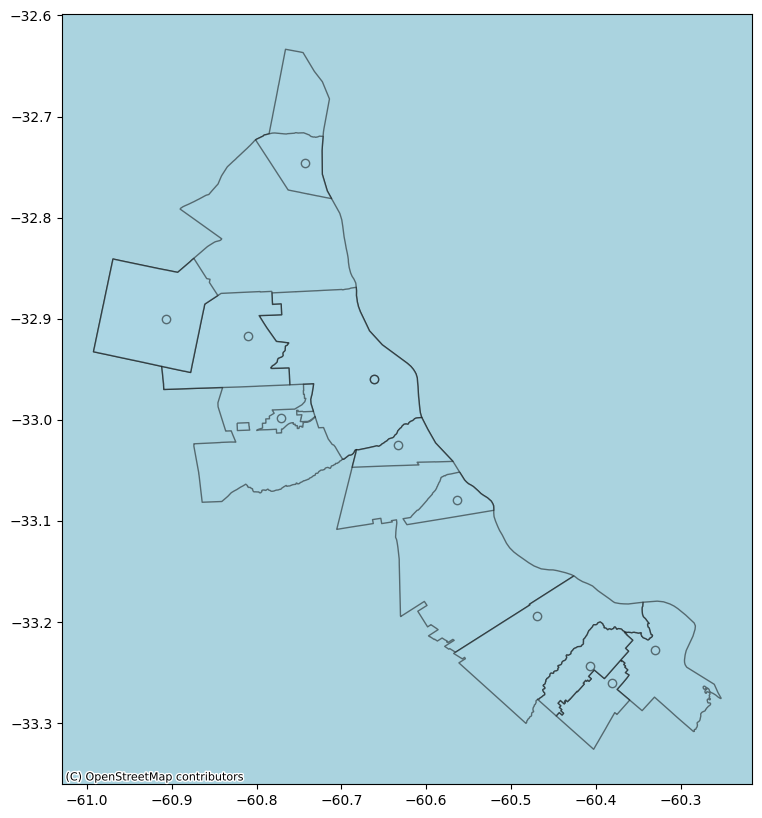

In [163]:
import contextily as ctx
import matplotlib.pyplot as plt

# Crear la visualización
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar tus geometrías
mapas_combinados.plot(ax=ax, alpha=0.5, edgecolor='black', color='lightblue')

# Agregar el mapa base de OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Mostrar el resultado
plt.show()

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import numpy as np
from shapely.geometry import Point

In [165]:
#Cargamos mapa de encuestas y pusimos display all para poder ver si habia diferencias
encuesta_rosario = gpd.read_file('/content/Rosario F.xlsx')
encuesta_rosario

# Ajustar opciones globales de pandas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

# Ahora imprime tu DataFrame
print(encuesta_rosario)

    interview__key METODO  Coord1__Latitude  Coord1__Longitude      EDAD  \
0      56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1      67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2      24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3      84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4      21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   
5      16-53-72-77    F2F        -32.918831         -60.701551   46 a 55   
6      33-52-26-63    F2F        -32.919319         -60.701945  56 y mas   
7      97-65-95-19    F2F        -32.919283         -60.702176  56 y mas   
8      60-33-90-60    F2F        -32.920606         -60.700574   26 a 35   
9      80-36-02-32    F2F        -32.920734         -60.703901   46 a 55   
10     88-84-75-28    F2F        -32.920294         -60.703054   26 a 35   
11     94-39-26-50    F2F        -32.920758         -60.703289   26 a 35   
12     29-38

In [95]:
#Crea la columna geografia en base a la latitud y longitud
from shapely.geometry import Point

encuesta_rosario['geometry'] = encuesta_rosario.apply(
    lambda row: Point(row['Coord1__Latitude'], row['Coord1__Longitude']), axis=1
)
encuesta_rosario

interview__key METODO  Coord1__Latitude  Coord1__Longitude      EDAD  \
0      56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1      67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2      24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3      84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4      21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   
5      16-53-72-77    F2F        -32.918831         -60.701551   46 a 55   
6      33-52-26-63    F2F        -32.919319         -60.701945  56 y mas   
7      97-65-95-19    F2F        -32.919283         -60.702176  56 y mas   
8      60-33-90-60    F2F        -32.920606         -60.700574   26 a 35   
9      80-36-02-32    F2F        -32.920734         -60.703901   46 a 55   
10     88-84-75-28    F2F        -32.920294         -60.703054   26 a 35   
11     94-39-26-50    F2F        -32.920758         -60.703289   26 a 35   
12     29-38-84-70    F2F        -32.920701         -60.725941   26 a 35   
13     74-83-57-74    F2F        -32.931223         -60.651649   36 a 45   
14     94-78-51-09    F2F        -32.938063         -60.671751   26 a 35   
15     48-06-06-38    F2F        -32.932674         -60.654865   16 a 25   
16     72-81-50-58    F2F        -32.932771         -60.654666   36 a 45   
17     77-91-68-37    F2F        -32.931514         -60.653774  56 y mas   
18     70-95-28-50    F2F        -32.931567         -60.651831   26 a 35   
19     43-92-62-18    F2F        -32.938087         -60.651665  56 y mas   
20     25-33-90-99    F2F        -32.942203         -60.652930   36 a 45   
21     96-32-78-61    F2F        -32.942085         -60.652765   26 a 35   
22     57-54-06-69    F2F        -32.939812         -60.652192   26 a 35   
23     72-79-77-32    F2F        -32.946106         -60.635149   16 a 25   
24     72-38-46-54    F2F        -32.945453         -60.635295   26 a 35   
25     90-01-40-58    F2F        -32.945077         -60.634991   16 a 25   
26     93-91-89-49    F2F        -32.958224         -60.636082  56 y mas   
27     52-96-78-22    F2F        -32.958398         -60.628033  56 y mas   
28     65-58-42-37    F2F        -32.955346         -60.643346   26 a 35   
29     38-21-81-27    F2F        -32.955503         -60.643702   46 a 55   
30     02-40-40-60    F2F        -32.947129         -60.663885   26 a 35   
31     70-44-17-48    F2F        -32.947078         -60.663475   46 a 55   
32     95-29-62-65    F2F        -32.947613         -60.662854   26 a 35   
33     36-04-83-07    F2F        -32.957824         -60.702572  56 y mas   
34     48-98-17-65    F2F        -32.956585         -60.701408   26 a 35   
35     56-30-70-54    F2F        -32.956529         -60.699557  56 y mas   
36     67-13-95-63    F2F        -32.957594         -60.700276   36 a 45   
37     75-83-70-22    F2F        -32.957783         -60.702144  56 y mas   
38     36-01-40-47    F2F        -32.956835         -60.699106   16 a 25   
39     38-73-44-80    F2F        -32.957268         -60.699207  56 y mas   
40     45-15-97-65    F2F        -32.956762         -60.699232   36 a 45   
41     60-25-42-18    F2F        -32.956561         -60.697221   46 a 55   
42     86-26-22-37    F2F        -32.958363         -60.698530   46 a 55   
43     73-96-66-43    F2F        -32.964163         -60.666879  56 y mas   
44     81-57-31-30    F2F        -32.964282         -60.666885   26 a 35   
45     33-25-94-25    F2F        -32.964544         -60.666694   36 a 45   
46     05-87-39-67    F2F        -32.958565         -60.635757   16 a 25   
47     31-63-67-07    F2F        -32.957669         -60.637936   16 a 25   
48     39-59-40-00    F2F        -32.958326         -60.636650  56 y mas   
49     69-51-31-39    F2F        -32.958310         -60.636942   36 a 45   
50     72-23-06-22    F2F        -32.957599         -60.637811   16 a 25   
51     76-02-17-71    F2F        -32.958280         

In [96]:
#Convierte encuesta en un geodataframe, notamos que no tiene CRS
encuesta_rosario = gpd.GeoDataFrame(
    encuesta_rosario, geometry=gpd.points_from_xy(x=encuesta_rosario.Coord1__Longitude, y=encuesta_rosario.Coord1__Latitude)
)
encuesta_rosario["geometry"] = encuesta_rosario.centroid
encuesta_rosario

interview__key METODO  Coord1__Latitude  Coord1__Longitude      EDAD  \
0      56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1      67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2      24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3      84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4      21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   
5      16-53-72-77    F2F        -32.918831         -60.701551   46 a 55   
6      33-52-26-63    F2F        -32.919319         -60.701945  56 y mas   
7      97-65-95-19    F2F        -32.919283         -60.702176  56 y mas   
8      60-33-90-60    F2F        -32.920606         -60.700574   26 a 35   
9      80-36-02-32    F2F        -32.920734         -60.703901   46 a 55   
10     88-84-75-28    F2F        -32.920294         -60.703054   26 a 35   
11     94-39-26-50    F2F        -32.920758         -60.703289   26 a 35   
12     29-38-84-70    F2F        -32.920701         -60.725941   26 a 35   
13     74-83-57-74    F2F        -32.931223         -60.651649   36 a 45   
14     94-78-51-09    F2F        -32.938063         -60.671751   26 a 35   
15     48-06-06-38    F2F        -32.932674         -60.654865   16 a 25   
16     72-81-50-58    F2F        -32.932771         -60.654666   36 a 45   
17     77-91-68-37    F2F        -32.931514         -60.653774  56 y mas   
18     70-95-28-50    F2F        -32.931567         -60.651831   26 a 35   
19     43-92-62-18    F2F        -32.938087         -60.651665  56 y mas   
20     25-33-90-99    F2F        -32.942203         -60.652930   36 a 45   
21     96-32-78-61    F2F        -32.942085         -60.652765   26 a 35   
22     57-54-06-69    F2F        -32.939812         -60.652192   26 a 35   
23     72-79-77-32    F2F        -32.946106         -60.635149   16 a 25   
24     72-38-46-54    F2F        -32.945453         -60.635295   26 a 35   
25     90-01-40-58    F2F        -32.945077         -60.634991   16 a 25   
26     93-91-89-49    F2F        -32.958224         -60.636082  56 y mas   
27     52-96-78-22    F2F        -32.958398         -60.628033  56 y mas   
28     65-58-42-37    F2F        -32.955346         -60.643346   26 a 35   
29     38-21-81-27    F2F        -32.955503         -60.643702   46 a 55   
30     02-40-40-60    F2F        -32.947129         -60.663885   26 a 35   
31     70-44-17-48    F2F        -32.947078         -60.663475   46 a 55   
32     95-29-62-65    F2F        -32.947613         -60.662854   26 a 35   
33     36-04-83-07    F2F        -32.957824         -60.702572  56 y mas   
34     48-98-17-65    F2F        -32.956585         -60.701408   26 a 35   
35     56-30-70-54    F2F        -32.956529         -60.699557  56 y mas   
36     67-13-95-63    F2F        -32.957594         -60.700276   36 a 45   
37     75-83-70-22    F2F        -32.957783         -60.702144  56 y mas   
38     36-01-40-47    F2F        -32.956835         -60.699106   16 a 25   
39     38-73-44-80    F2F        -32.957268         -60.699207  56 y mas   
40     45-15-97-65    F2F        -32.956762         -60.699232   36 a 45   
41     60-25-42-18    F2F        -32.956561         -60.697221   46 a 55   
42     86-26-22-37    F2F        -32.958363         -60.698530   46 a 55   
43     73-96-66-43    F2F        -32.964163         -60.666879  56 y mas   
44     81-57-31-30    F2F        -32.964282         -60.666885   26 a 35   
45     33-25-94-25    F2F        -32.964544         -60.666694   36 a 45   
46     05-87-39-67    F2F        -32.958565         -60.635757   16 a 25   
47     31-63-67-07    F2F        -32.957669         -60.637936   16 a 25   
48     39-59-40-00    F2F        -32.958326         -60.636650  56 y mas   
49     69-51-31-39    F2F        -32.958310         -60.636942   36 a 45   
50     72-23-06-22    F2F        -32.957599         -60.637811   16 a 25   
51     76-02-17-71    F2F        -32.958280         

In [130]:
encuesta_rosario = encuesta_rosario.set_crs(epsg=3857)
print("CRS de los puntos:", encuesta_rosario.crs)

AttributeError: 'DataFrame' object has no attribute 'set_crs'

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import numpy as np
from shapely.geometry import Point

# Cargamos mapa de encuestas y pusimos display all para poder ver si habia diferencias
encuesta_rosario = gpd.read_file('/content/Rosario F.xlsx')

# Ajustar opciones globales de pandas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas


# Crea la columna geografia en base a la latitud y longitud
encuesta_rosario['geometry'] = encuesta_rosario.apply(
    lambda row: Point(row['Coord1__Latitude'], row['Coord1__Longitude']), axis=1
)

#Convierte encuesta en un geodataframe y establece el CRS en la misma línea
encuesta_rosario = gpd.GeoDataFrame(
    encuesta_rosario, geometry=gpd.points_from_xy(x=encuesta_rosario.Coord1__Longitude, y=encuesta_rosario.Coord1__Latitude),
    crs="EPSG:4326"  # Define el CRS aquí, asumiendo que tus coordenadas están en WGS 84
)

# Si necesitas otro CRS (como EPSG:3857), puedes convertirlo después:
encuesta_rosario = encuesta_rosario.to_crs(epsg=3857)

print("CRS de los puntos:", encuesta_rosario.crs)
encuesta_rosario

CRS de los puntos: EPSG:3857


interview__key METODO  Coord1__Latitude  Coord1__Longitude      EDAD  \
0      56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1      67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2      24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3      84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4      21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   
5      16-53-72-77    F2F        -32.918831         -60.701551   46 a 55   
6      33-52-26-63    F2F        -32.919319         -60.701945  56 y mas   
7      97-65-95-19    F2F        -32.919283         -60.702176  56 y mas   
8      60-33-90-60    F2F        -32.920606         -60.700574   26 a 35   
9      80-36-02-32    F2F        -32.920734         -60.703901   46 a 55   
10     88-84-75-28    F2F        -32.920294         -60.703054   26 a 35   
11     94-39-26-50    F2F        -32.920758         -60.703289   26 a 35   
12     29-38-84-70    F2F        -32.920701         -60.725941   26 a 35   
13     74-83-57-74    F2F        -32.931223         -60.651649   36 a 45   
14     94-78-51-09    F2F        -32.938063         -60.671751   26 a 35   
15     48-06-06-38    F2F        -32.932674         -60.654865   16 a 25   
16     72-81-50-58    F2F        -32.932771         -60.654666   36 a 45   
17     77-91-68-37    F2F        -32.931514         -60.653774  56 y mas   
18     70-95-28-50    F2F        -32.931567         -60.651831   26 a 35   
19     43-92-62-18    F2F        -32.938087         -60.651665  56 y mas   
20     25-33-90-99    F2F        -32.942203         -60.652930   36 a 45   
21     96-32-78-61    F2F        -32.942085         -60.652765   26 a 35   
22     57-54-06-69    F2F        -32.939812         -60.652192   26 a 35   
23     72-79-77-32    F2F        -32.946106         -60.635149   16 a 25   
24     72-38-46-54    F2F        -32.945453         -60.635295   26 a 35   
25     90-01-40-58    F2F        -32.945077         -60.634991   16 a 25   
26     93-91-89-49    F2F        -32.958224         -60.636082  56 y mas   
27     52-96-78-22    F2F        -32.958398         -60.628033  56 y mas   
28     65-58-42-37    F2F        -32.955346         -60.643346   26 a 35   
29     38-21-81-27    F2F        -32.955503         -60.643702   46 a 55   
30     02-40-40-60    F2F        -32.947129         -60.663885   26 a 35   
31     70-44-17-48    F2F        -32.947078         -60.663475   46 a 55   
32     95-29-62-65    F2F        -32.947613         -60.662854   26 a 35   
33     36-04-83-07    F2F        -32.957824         -60.702572  56 y mas   
34     48-98-17-65    F2F        -32.956585         -60.701408   26 a 35   
35     56-30-70-54    F2F        -32.956529         -60.699557  56 y mas   
36     67-13-95-63    F2F        -32.957594         -60.700276   36 a 45   
37     75-83-70-22    F2F        -32.957783         -60.702144  56 y mas   
38     36-01-40-47    F2F        -32.956835         -60.699106   16 a 25   
39     38-73-44-80    F2F        -32.957268         -60.699207  56 y mas   
40     45-15-97-65    F2F        -32.956762         -60.699232   36 a 45   
41     60-25-42-18    F2F        -32.956561         -60.697221   46 a 55   
42     86-26-22-37    F2F        -32.958363         -60.698530   46 a 55   
43     73-96-66-43    F2F        -32.964163         -60.666879  56 y mas   
44     81-57-31-30    F2F        -32.964282         -60.666885   26 a 35   
45     33-25-94-25    F2F        -32.964544         -60.666694   36 a 45   
46     05-87-39-67    F2F        -32.958565         -60.635757   16 a 25   
47     31-63-67-07    F2F        -32.957669         -60.637936   16 a 25   
48     39-59-40-00    F2F        -32.958326         -60.636650  56 y mas   
49     69-51-31-39    F2F        -32.958310         -60.636942   36 a 45   
50     72-23-06-22    F2F        -32.957599         -60.637811   16 a 25   
51     76-02-17-71    F2F        -32.958280         

In [98]:
# Instalar Folium
!pip install folium pandas


In [167]:
# Añadir puntos con colores personalizados
# Añadir los puntos de la encuesta como círculos
for _, row in encuesta_rosario.iterrows():
    folium.CircleMarker(
        location=[row['Coord1__Latitude'], row['Coord1__Longitude']],
        radius=5,  # Tamaño del círculo
        color='blue',  # Color del borde
        fill=True,  # Rellenar el círculo
        fill_color='blue',  # Color de relleno
        fill_opacity=0.6,  # Opacidad del relleno
        popup=f"Respuesta: {row['interview__key']}"  # Información adicional al hacer clic
    ).add_to(mapa)
mapa



In [168]:
import folium

# Crear el mapa base
mapa = folium.Map(location=[-32.95, -60.64], zoom_start=12)

# Función para asignar colores según la respuesta
def obtener_color(respuesta):
    if respuesta == "Sí":
        return "green"
    elif respuesta == "No":
        return "red"
    else:
        return "orange"

# Añadir puntos como círculos personalizados
for _, row in encuesta_rosario.iterrows():
    folium.CircleMarker(
        location=[row['Coord1__Latitude'], row['Coord1__Longitude']],
        radius=5,  # Tamaño del círculo
        color=obtener_color(row['interview__key']),  # Color del borde
        fill=True,  # Activar relleno
        fill_color=obtener_color(row['interview__key']),  # Color de relleno
        fill_opacity=0.6,  # Transparencia del relleno
        popup=f"Respuesta: {row['interview__key']}"  # Información en el popup
    ).add_to(mapa)

# Mostrar el mapa
mapa


In [172]:
import geopandas as gpd

# Cargar el GeoJSON
gdf = gpd.read_file("/content/mapas_combinados.geojson")

# Filtrar solo MultiPolygon o Polygon (eliminar puntos)
gdf = gdf[gdf.geometry.type.isin(['Polygon', 'MultiPolygon'])]

# Guardar el archivo limpio
gdf.to_file("mapa_limpio.geojson", driver="GeoJSON")


In [173]:
import folium

# Crear el mapa base centrado en una ubicación específica
mapa = folium.Map(location=[-32.95, -60.64], zoom_start=12)

# Añadir los límites geográficos desde el archivo GeoJSON
geojson_path = "/content/mapa_ploteado.geojson"  # Cambia este nombre según tu archivo
folium.GeoJson(
    geojson_path,
    name="Límites Geográficos",
    style_function=lambda feature: {
        'color': 'black',  # Color del borde
        'weight': 2,  # Grosor del borde
        'fillOpacity': 0.1  # Opacidad del relleno
    }
).add_to(mapa)


# Añadir los puntos de la encuesta al mapa como círculos
for _, row in encuesta_rosario.iterrows():
    folium.CircleMarker(
        location=[row['Coord1__Latitude'], row['Coord1__Longitude']],
        radius=5,  # Tamaño del círculo
        color=obtener_color(row['interview__key']),  # Color del borde
        fill=True,  # Activar el relleno
        fill_color=obtener_color(row['interview__key']),  # Color del relleno
        fill_opacity=0.6,  # Opacidad del relleno
        popup=f"Respuesta: {row['interview__key']}"  # Información adicional
    ).add_to(mapa)

# Mostrar el mapa
mapa
